In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import seaborn as sns
import os

In [2]:
device = torch.device('cpu') # GUYS USE THIS LINE AND ONLY THIS, I'LL teach you how to use GPU later
print(device)

cpu


Hi guys, so the task is to write neural network anticipating length of possum. I want you to use already implemented neural network architecture, consisting of one linear unit. All data is in file /data/possum.csv.
I'll try to guide you through whole process, so edit only parts marked with #!# ... here code ... #!# or ?


we want to create linear regression using only one argument, so we need to find which argument is the most correlated with 'totlngth' columnn meaning total length of possum

In [3]:
path = os.path.join('possum.csv')
data = pd.read_csv(path)
print(data.head())

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  


#1 TASK
plot correlation heatmap and find most correlated parameter with totlngth

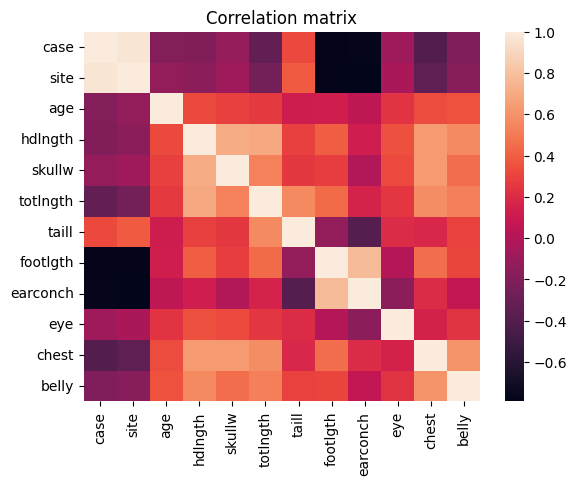

Attribute most correlated with 'totlngth' is hdlngth.


In [4]:
# Correlation heatmap

corr_matrix = data.corr(numeric_only = True)
sns.heatmap(corr_matrix)
plt.title('Correlation matrix')
plt.show()

# Finding attribute most correlated with 'totlngth'

correlated = corr_matrix.loc['totlngth']
correlated.drop('totlngth', inplace = True)
corr_att = correlated.idxmax()
print('Attribute most correlated with \'totlngth\' is ' + corr_att + '.')

#2 TASK
Scatter totlngth vs your_parameter

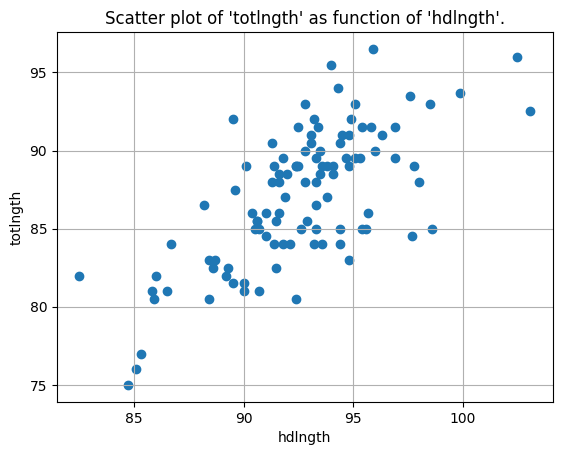

In [5]:
plt.scatter(data[corr_att], data['totlngth'])
plt.ylabel('totlngth')
plt.xlabel(corr_att)
plt.title('Scatter plot of \'totlngth\' as function of \'' + corr_att + '\'.')
plt.grid()
plt.show()

In [6]:
# Linear regression class with one linear unit

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        # super function. It inherits from nn.Module and we can access everything in nn.Module
        super(LinearRegression, self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# QUESTION: model.forward(x) acts in the very same way as model.linear(x)

#3 TASK
Bellow define:
input_dim,
output_dim,
learning_rate

In [32]:
# define model

input_dim = 1 # only 'hdlngth'
output_dim = 1 # only 'totlngth'
model = LinearRegression(input_dim, output_dim) 

# criterion of error

criterion = nn.MSELoss()

# define input and output vectors of np.array type

X = np.array(data['hdlngth'])
Y = np.array(data['totlngth'])

# Optimization (find parameters that minimize error)

learning_rate = 0.001  
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

###
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.00001, max_lr=0.001)
###

# we convert input and output vectors to tensor type

X_t = torch.tensor(X.reshape(X.shape[0], 1), requires_grad = True).float()
Y_t = torch.tensor(Y.reshape(X.shape[0], 1), requires_grad = True).float()

# QUESTION: why do we add .float() at the end?
# QUESTION: how to find optimal learning_rate?

#4 TASK find out optimal number of iterations.
Every few iterations:
-print epoch number,
-print parameters,
-plot data and fitted function

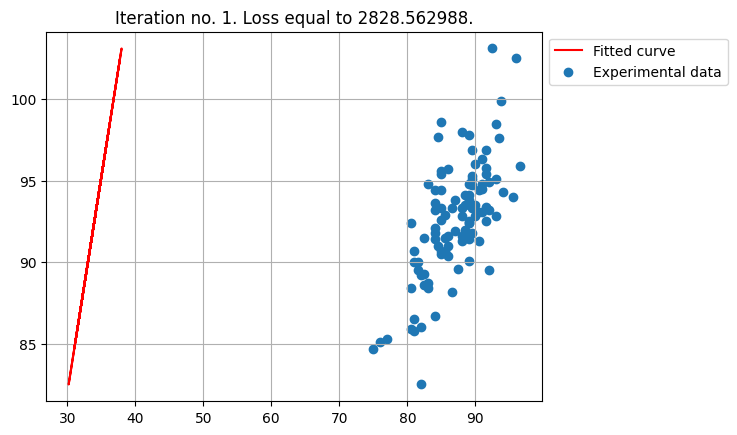

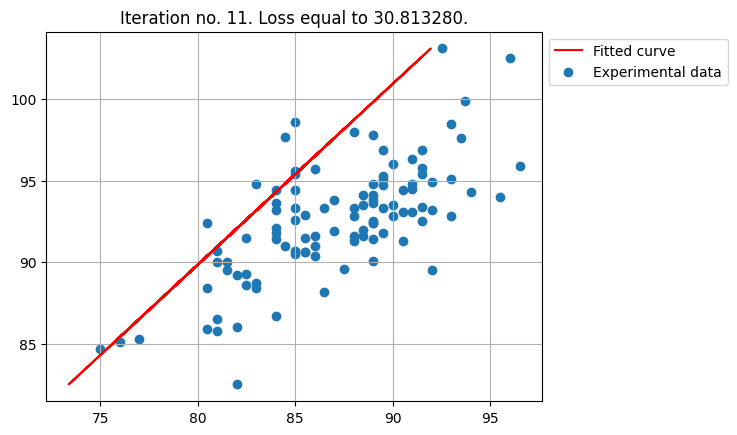

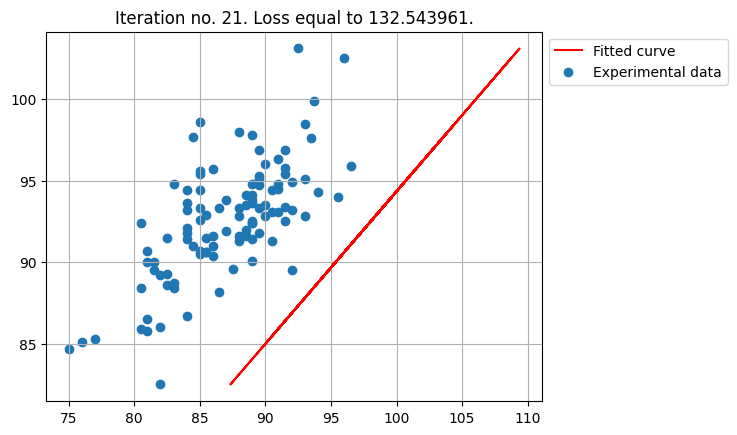

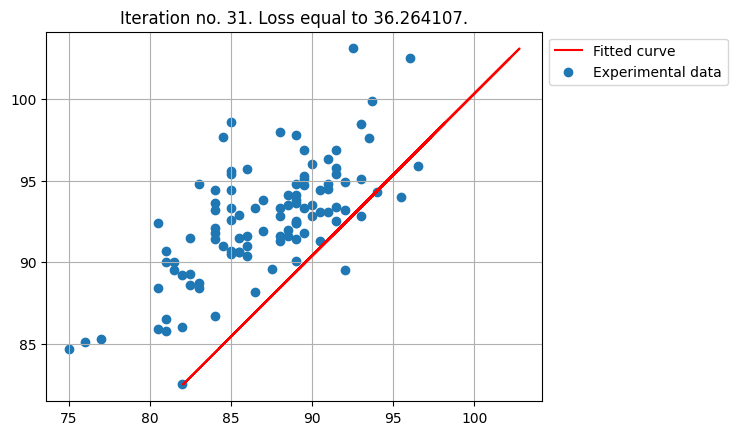

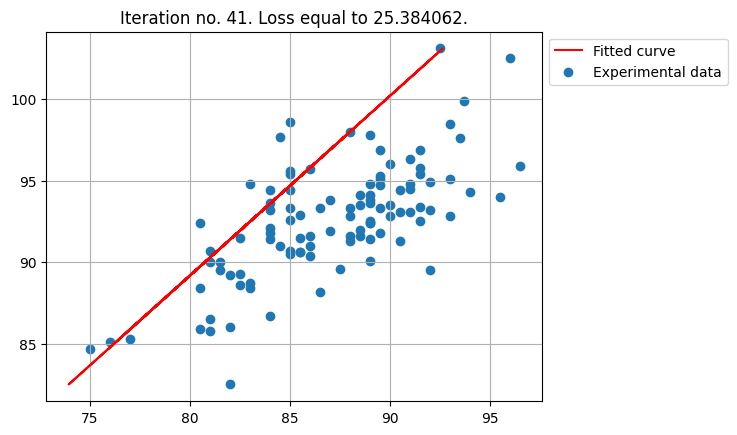

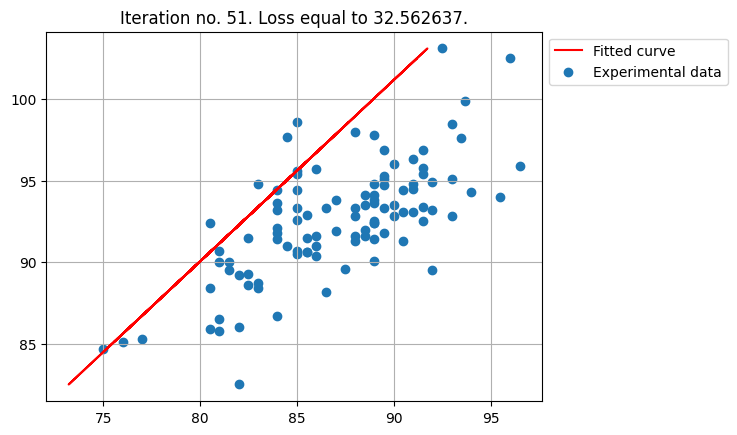

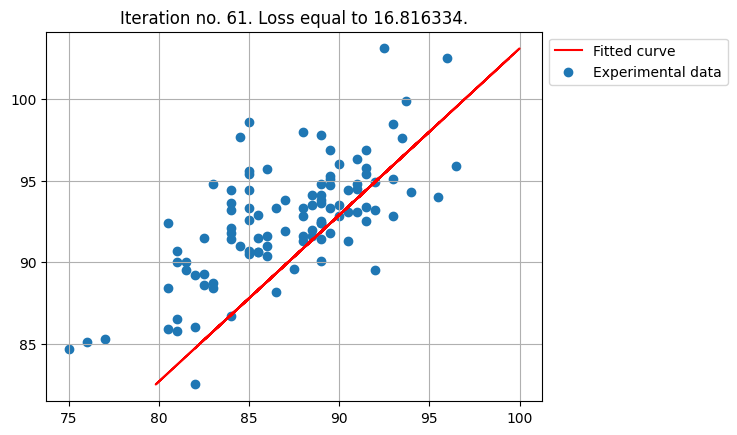

In [33]:
# WARNING: run previous chunk to reset model parameters 

# train model

iteration_number = 61
loss_list = []

for iteration in range(iteration_number):

    results = model.forward(X_t)    # calculate predictions
    loss = criterion(results, Y_t)  # calculate loss (in our case MSE)
    loss_list.append(loss.detach().numpy())

    # plot predictions and original data after conversion to np.array

    if iteration % 10 == 0:
        names = []
        plt.plot(results.detach().numpy(), X_t.detach().numpy(), color = 'red')
        names.append('Fitted curve')
        plt.scatter(Y_t.detach().numpy(), X_t.detach().numpy())
        names.append('Experimental data')
        plt.title('Iteration no. %i. ' %(iteration + 1) +  'Loss equal to %f.' %loss)
        plt.legend(names, bbox_to_anchor = [1, 1])
        plt.grid()
        plt.show()
    
    # and calculations

    optimizer.zero_grad()   # clear gradient (of loss function with respect to parameters [bias + slope])
    loss.backward()         # calculate gradient (of loss function with respect to parameters) and save it (counterintuitively) with parameters' variables
    optimizer.step()        # update parameters

    ###
    scheduler.step()
    ###

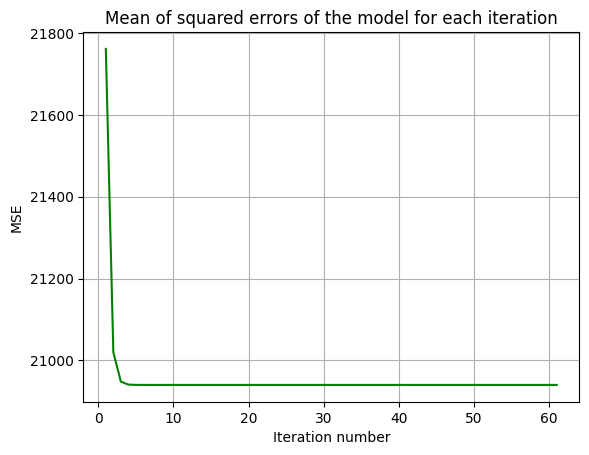

In [9]:
plt.plot(range(1, len(loss_list) + 1), loss_list, color = 'green')
plt.title('Mean of squared errors of the model for each iteration')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.grid()
plt.show()